# Load libraries

In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'/home/beangoben/projects/gpmol')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "Century Gothic"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['text.usetex'] = False 
plt.rcParams['mathtext.rm'] = "Century Gothic"
plt.rcParams['mathtext.it'] = "Century Gothic:italic"
plt.rcParams['mathtext.bf'] = "Century Gothic:bold"
plt.rcParams['axes.unicode_minus'] =  False

In [8]:
from IPython.display import display
import math

import numpy as np
import pandas as pd
import gpmol as gpm
from gpmol.utils.plotting import *

from collections import OrderedDict
def rename_keys(adict,orig_name,new_name):
    new_dict = OrderedDict()
    for key,item in adict.items():
        if orig_name not in key:
            new_dict[key]=item
        else:
            new_dict[key.replace(orig_name,new_name)]=item
    return new_dict


gpm.logging.set_level('warning')
gpm.plot_settings()
gpm.pandas_settings()

# Traing Something+GP rxn calibration


## Load a Dataset

In [9]:
calc_types = ['GCM','DLPNO','PM7']
target='ORP_exp'

df = pd.read_csv('data/redox_calibration.csv')

In [10]:
from gpmol.features import RegressionTarget, RxnFP, Properties
from gpmol.data_transforms import SMILES2MOL


calib_label ='ORP_rxnfpGP'

preproc = gpm.Preprocessor(df)
preproc.append([
    SMILES2MOL('smiles_r','mol_r'),
    SMILES2MOL('smiles_l','mol_l'),
    RegressionTarget(col_labels=target,units='mV'),
    RxnFP(cols=['mol_r','mol_l'],rxnfp_type='diff',fp_type='count-morgan',fp_args={'nBits': 2048, 'radius': 6},reduce_dim='boosted')
])
gp = preproc.make_gpmol()
gp.minimize()
cv_results = gp.cross_validate()
df[calib_label]=cv_results['GP_pred'].flatten()
df[calib_label+'_std']=cv_results['GP_std'].flatten()
cv_results = rename_keys(cv_results,'GP','rxnfpGP')
cv_results.update(gp.comparison_suite())
results_df = gp.summary_results(cv_results,set_tag='CV',trim=True,save=True)

        
for calc_type in  ['GCM','DLPNO','PM7']:
    baseline ='ORP_{}'.format(calc_type)
    calib_label ='ORP_{}GP'.format(calc_type)
    diff_label= 'ORP_{}diff'.format(calc_type)
    print(calc_type)
    not_null = pd.notnull(df[baseline])
    if calc_type not in ['GCM']:
        linfit ='ORP_{}linfit'.format(calc_type)
        linear_fit = np.poly1d(np.polyfit(df.loc[not_null,baseline],df.loc[not_null,target],1))
        df.loc[not_null,linfit]=linear_fit(df.loc[not_null,baseline])
        df.loc[not_null,diff_label]=df.loc[not_null,target]-df.loc[not_null,linfit]
    else:
        linfit = baseline
        df.loc[not_null,diff_label]=df.loc[not_null,target]-df.loc[not_null,baseline]
        
    preproc = gpm.Preprocessor(df.loc[not_null])
    preproc.append([
        SMILES2MOL('smiles_r','mol_r'),
        SMILES2MOL('smiles_l','mol_l'),
        RegressionTarget(col_labels=diff_label,units='mV'),
        RxnFP(cols=['mol_r','mol_l'],rxnfp_type='diff',fp_type='count-morgan',fp_args={'nBits': 2048, 'radius': 6},reduce_dim='boosted')
    ])
    gp = preproc.make_gpmol()
    gp.minimize()
    cv_results = gp.cross_validate()
    df.loc[not_null,calib_label]=df.loc[not_null,linfit]+cv_results['GP_pred'].flatten()
    df.loc[not_null,calib_label+'_std']=cv_results['GP_std'].flatten()
    cv_results['GP_pred']=df.loc[not_null,calib_label].values.reshape(-1,1)
    cv_results['target']=df.loc[not_null,target].values.reshape(-1,1)
    
    cv_results = rename_keys(cv_results,'GP','{}GP_calib'.format(calc_type))


    results_df = results_df.append(gp.summary_results(cv_results,set_tag='CV',trim=True,save=True))
    results_df.to_csv('Redox_calib_results{}.csv'.format(calc_type),index=False)


results_df.to_csv('Redox_calib_results.csv',index=False)
results_df

Shape of x must be 2D at computation. 



Shape of x must be 2D at computation. 


Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at 

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-020d3ac9-2213/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-020d3ac9-2213/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127,

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-020d3ac9-2213/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SquaredExponential-6ba7920a-2204/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SquaredExponential-6ba7920a-2204/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", l

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'White-a04ddbcf-2202/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start


Shape of x must be 2D at computation. 


Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at 

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d26014e6-4415/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d26014e6-4415/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127,

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d26014e6-4415/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SquaredExponential-9123bd27-4406/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SquaredExponential-9123bd27-4406/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", l

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'White-2328cffc-4404/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start

/home/beangoben/projects/gpmol/gpmol/data_transforms.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[mol_col] = df[smi_col].apply(smi2mol)
/home/beangoben/projects/gpmol/gpmol/data_transforms.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[mol_col] = df[smi_col].apply(smi2mol)


Shape of x must be 2D at computation. 



Shape of x must be 2D at computation. 


Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at 

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-be00414c-6617/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-be00414c-6617/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127,

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-be00414c-6617/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SquaredExponential-caa33c22-6608/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'SquaredExponential-caa33c22-6608/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", l

Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'White-27f2528c-6606/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/home/beangoben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start


Shape of x must be 2D at computation. 


Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at computation. 
Shape of x must be 2D at 

MAE  AE ($\sigma$)  RMSE    r  \
Task       Set Target        Approach                                        
Regression CV  ORP_exp       KernelRidge   26.34          24.59 36.04 0.59   
                             Lasso         31.32          27.93 41.96 0.39   
                             SVR           33.83          28.82 44.45 0.08   
                             rxnfpGP       21.17          23.07 31.31 0.71   
               ORP_GCMdiff   GCMGP_calib   21.84          22.34 31.24 0.71   
               ORP_DLPNOdiff DLPNOGP_calib 20.89          19.67 28.69 0.76   
               ORP_PM7diff   PM7GP_calib   20.94          17.95 27.58 0.78   

                                            $R^2$  
Task       Set Target        Approach              
Regression CV  ORP_exp       KernelRidge     0.34  
                             Lasso           0.10  
                             SVR            -0.01  
                             rxnfpGP         0.50  
               ORP_GCMdiff   GCMGP_calib     0.50  
               ORP_DLPNOdiff DLPNOGP_calib   0.57  
               ORP_PM7diff   PM7GP_calib     0.61

In [11]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
for calc_type in  ['GCM','DLPNO','PM7']:
    not_null = pd.notnull(df['ORP_{}GP'.format(calc_type)])
    print(calc_type,r2_score(df.loc[not_null]['ORP_exp'],df.loc[not_null]['ORP_{}GP'.format(calc_type)]))
    print(calc_type,pearsonr(df.loc[not_null]['ORP_{}GP'.format(calc_type)],df.loc[not_null]['ORP_exp'])[0])

GCM 0.5017726810392769
GCM 0.7097737677873882
DLPNO 0.5662264408487641
DLPNO 0.7618677452593465
PM7 0.6116158784879675
PM7 0.7826197322130379


## Extra: calibration

In [11]:
import matplotlib.pyplot as plt
import scipy as sp
def t_test(a,b):
    r,p = sp.stats.pearsonr(b,a)
    p2 = sp.stats.ttest_ind(a,b,equal_var=False)
    p3 = sp.stats.ttest_rel(a,b)
    slope, intercept, r_value, p_value, std_err = stats.linregress(b,a)
    print(r,p_value,p,p2.pvalue,p3.pvalue)
t_test(df[target], df[calib_label])
t_test(df['ORP_GCM'], df[calib_label])

0.7199007664503297 5.273685302536345e-14 5.273685302536369e-14 4.219931304665603e-70 1.9054722907162564e-67
0.6836041891578235 2.7929755977650597e-12 2.7929755977650743e-12 2.868497520694804e-69 1.1190263065407397e-66


## Extra: comparison

/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


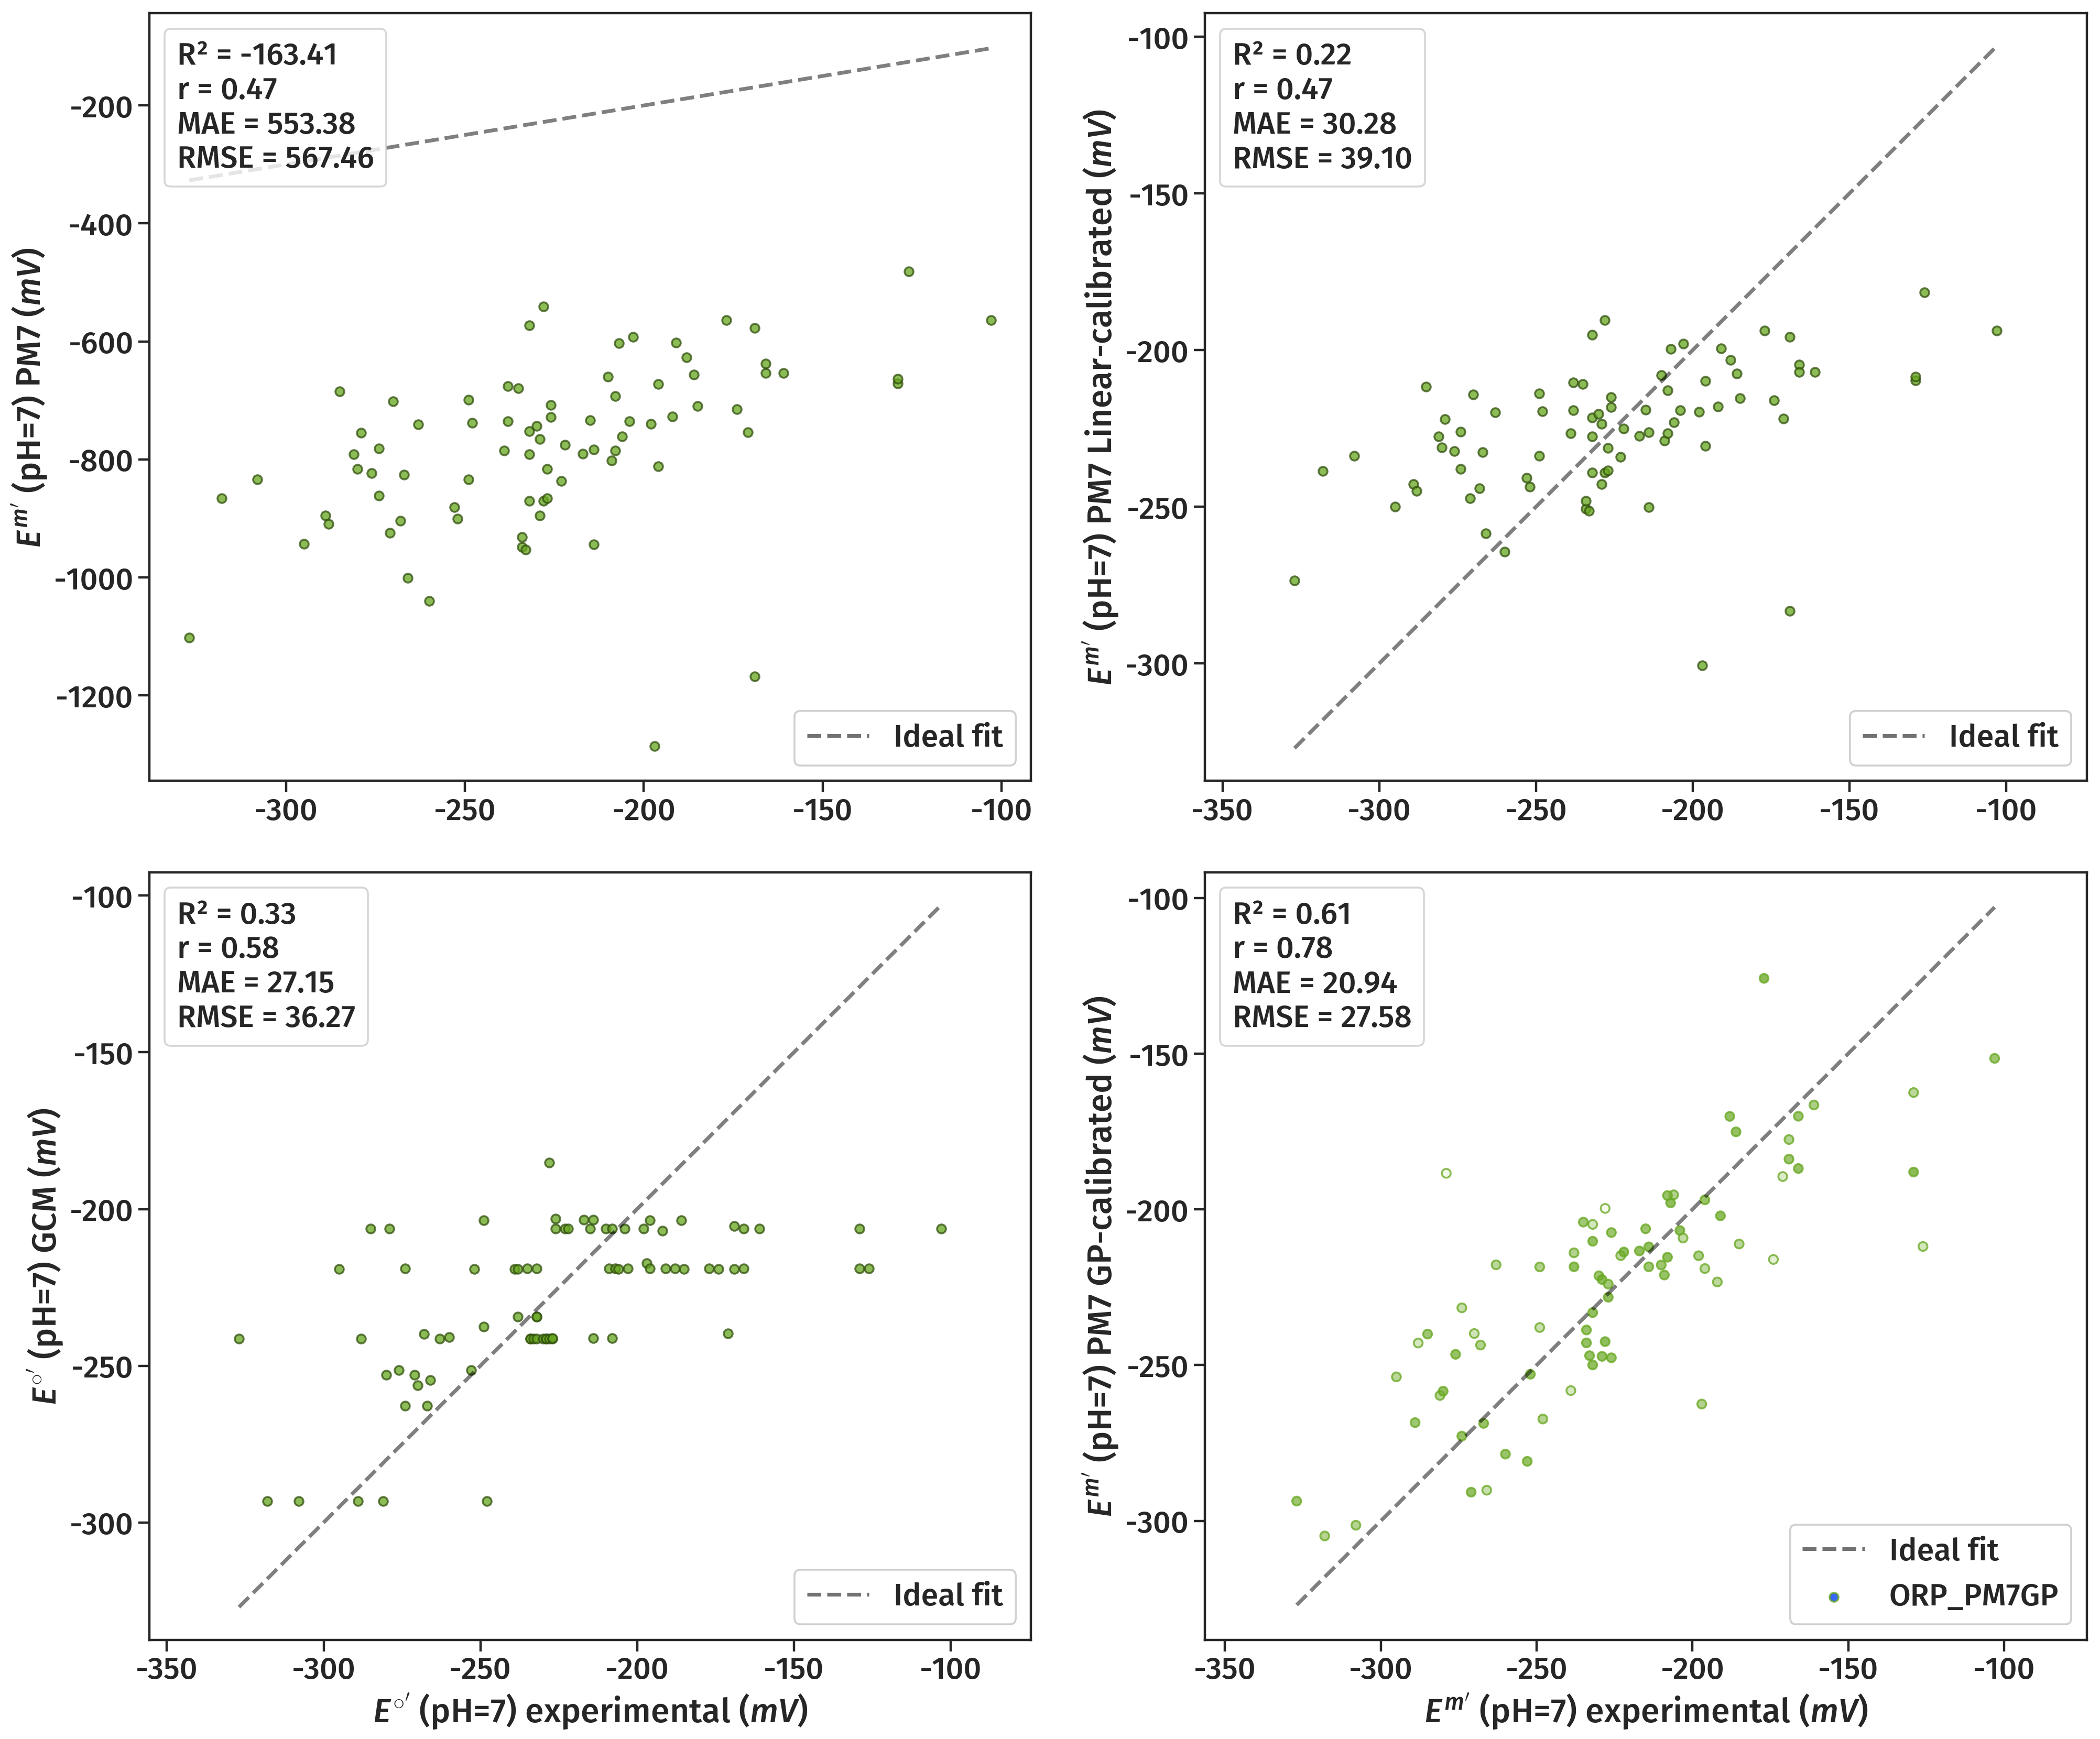

In [12]:
#awe.plot_settings()
col=gp.cols[diff_label]
cmap=gp.cmaps[diff_label]
sns.set_context('talk', font_scale=1.5)
plt.figure(figsize=(12*2,20))
plt.subplot(2, 2, 1)
y = df[baseline]
x = df[target]
gpm.utils.plotting.data_scatter(x=x,y=y,label_x=target,label_y=baseline,col=col)
plt.title('')
plt.ylabel('$E^{{m}^\prime}$ (pH=7) PM7 ($mV$)')
plt.xlabel('')
plt.subplot(2, 2, 2)
y = df[linfit]
x = df[target]
gpm.utils.plotting.data_scatter(x=x,y=y,label_x=target,label_y=linfit,col=col)
plt.title('')
plt.ylabel('$E^{{m}^\prime}$ (pH=7) PM7 Linear-calibrated ($mV$)')
plt.xlabel('')
plt.axis('equal')
plt.tight_layout()

plt.subplot(2, 2, 3)
y = df["ORP_GCM"]
x = df[target]
gpm.utils.plotting.data_scatter(x=x,y=y,label_x=target,label_y="ORP_GCM",col=col)
plt.tight_layout()
plt.ylabel('$E^{{\circ}^\prime}$ (pH=7) GCM ($mV$)')
plt.xlabel('$E^{{\circ}^\prime}$ (pH=7) experimental ($mV$)')
plt.axis('equal')
plt.tight_layout()
plt.subplot(2, 2, 4)
y = df[calib_label]
x = df[target]
z = df[calib_label+'_std']
plt.scatter(x,y,c=z,s=50,alpha=0.75,cmap=cmap,lw=1.5,edgecolor=col)
gpm.utils.plotting.data_scatter_extras(x, y)
plt.title('')
plt.ylabel('$E^{{m}^\prime}$ (pH=7) PM7 GP-calibrated ($mV$)')
plt.xlabel('$E^{{m}^\prime}$ (pH=7) experimental ($mV$)')
plt.axis('equal')
plt.tight_layout()
plt.show()